## Parameter Estimation

In [1]:
from progpy.models import ThrownObject
import matplotlib.pyplot as plt

times = [0, 1, 2, 3, 4, 5, 6, 7]
inputs = [{}]*8
outputs = [
    {'x': 1.83},
    {'x': 36.5091999066245},
    {'x': 60.05364349596605},
    {'x': 73.23733081022635},
    {'x': 76.47528104941956},
    {'x': 69.9146810161441},
    {'x': 53.74272753819968},
    {'x': 28.39355725512131},
]

m = ThrownObject(thrower_height=20, throwing_speed=3.1, g=15)

keys = ['thrower_height', 'throwing_speed', 'g']

print('Model configuration before')

for key in keys:
    print("-", key, m[key])

print('\nError: ', m.calc_error(times, inputs, outputs, dt=0.1))

Model configuration before
- thrower_height 20
- throwing_speed 3.1
- g 15

Error:  21635.29691636153


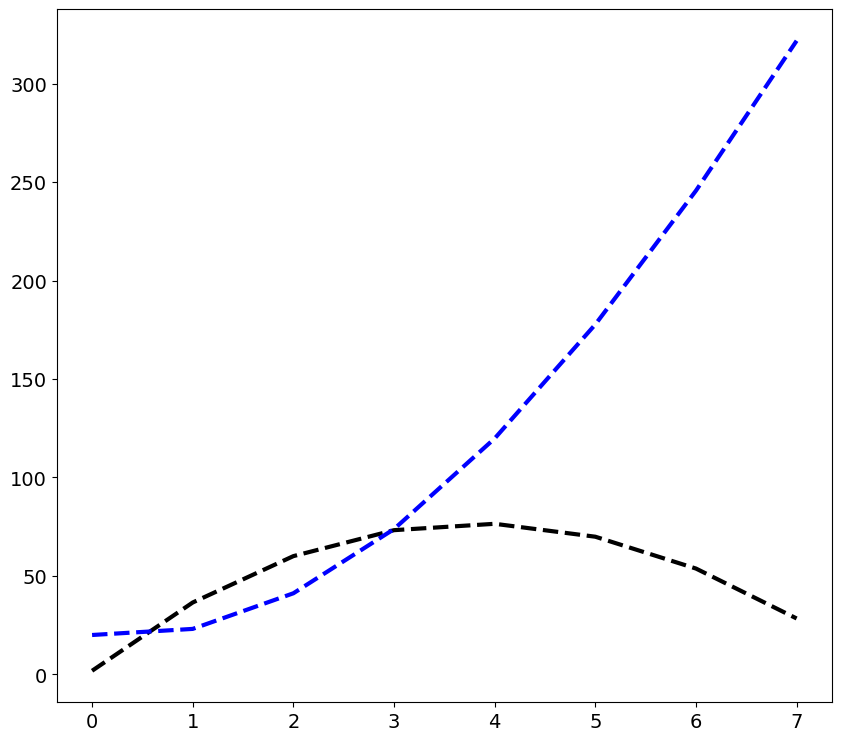

In [2]:
# Plot real data
pos = [state['x'] for state in outputs]
plt.plot(times, pos, color="black", linestyle="--")

# Plot simulation
simulated_results = m.simulate_to(times[-1], save_freq=1)
pos = [state['x'] for state in simulated_results.outputs]
plt.plot(times, pos, color="blue", linestyle="--")

plt.show()

In [3]:
m.estimate_params(times = times, inputs = inputs, outputs = outputs, keys = keys, dt=0.1)

print('\nOptimized configuration')

for key in keys:
    print("-", key, m[key])
    
print('\nError: ', m.calc_error(times, inputs, outputs, dt=0.1))


Optimized configuration
- thrower_height 1.8300457748259773
- throwing_speed 39.99999142762351
- g -9.810000469556282

Error:  6.494354802203999e-10


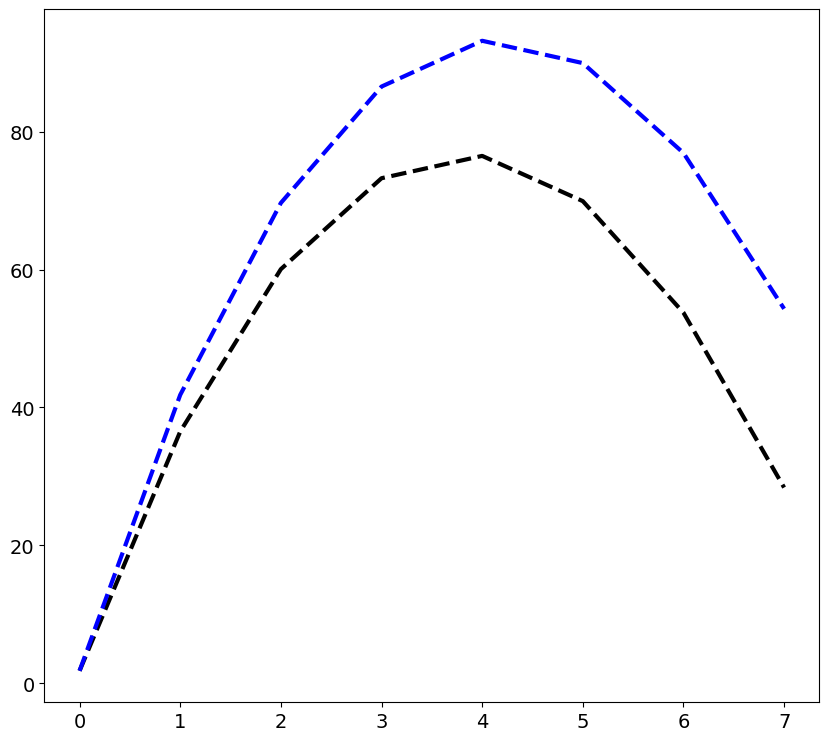

In [4]:
# Plot real data
pos = [state['x'] for state in outputs]
plt.plot(times, pos, color="black", linestyle="--")

# Plot simulation
simulated_results = m.simulate_to(times[-1], save_freq=1)
pos = [state['x'] for state in simulated_results.outputs]
plt.plot(times, pos, color="blue", linestyle="--")

plt.show()

## Noise Estimation

For a single noise value, have multiple simulations for that and that will show the distribution of possible values at that noise level
- Note that each noise value samples from a distribution already
- Use MonteCarlo from monte_carlo.py
- In 2024PHMTutorial, see monte_carlo example

Error: 655.0486488208738
Error: 187.8410011217271
Error: 337.25081593962307
Error: 38.8758620267904
Error: 364.92549850886826
Error: 385.95577329995285
Error: 131.01725834370592
Error: 222.19138269800575
Error: 238.12241179873703
Error: 263.64952734508563
Error: 194.27509376935873
Error: 357.49557722608506
Error: 281.12543304592975
Error: 342.46850758051215
Error: 251.1083486260413


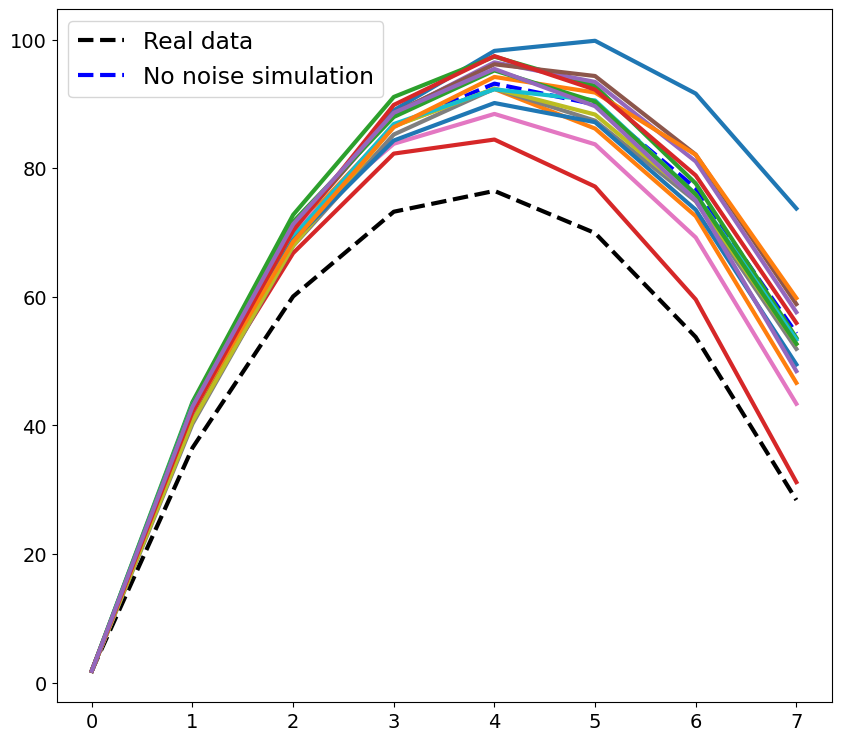

In [5]:
from progpy.models import ThrownObject
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Plot real data
times = [0, 1, 2, 3, 4, 5, 6, 7]
inputs = [{}]*8
outputs = [
    {'x': 1.83},
    {'x': 36.5091999066245},
    {'x': 60.05364349596605},
    {'x': 73.23733081022635},
    {'x': 76.47528104941956},
    {'x': 69.9146810161441},
    {'x': 53.74272753819968},
    {'x': 28.39355725512131},
]
pos = [state['x'] for state in outputs]
plt.plot(times, pos, color="black", linestyle="--", label="Real data")

# Plot model with no noise
m = ThrownObject(process_noise=0, measurement_noise=0)
simulated_results = m.simulate_to(times[-1], save_freq=1)
pos = [state['x'] for state in simulated_results.outputs]
plt.plot(times, pos, color="blue", linestyle="--", label="No noise simulation")

# Plot monte carlo simulations with random noise values
def estimate_noise(m, times, inputs, outputs):
    min_error = float('inf')   

    for _ in range(15):
        m.parameters['process_noise'] = 1
        m.parameters['measurement_noise'] = 0
        simulated_results = m.simulate_to(times[-1], save_freq=1)

        pos = [state['x'] for state in simulated_results.outputs]
        data_pos = [state['x'] for state in outputs]
        
        error = np.mean((np.array(pos) - np.array(data_pos))**2)
        print('Error:', error)
        
        plt.plot(simulated_results.times, pos)

estimate_noise(m, times, inputs, outputs)
plt.legend()
plt.show()

Error: 37.422027169926224
Process noise: {'x': np.float64(1.0), 'v': np.float64(1.0)}
Measurement noise: {'x': np.float64(0.0)}


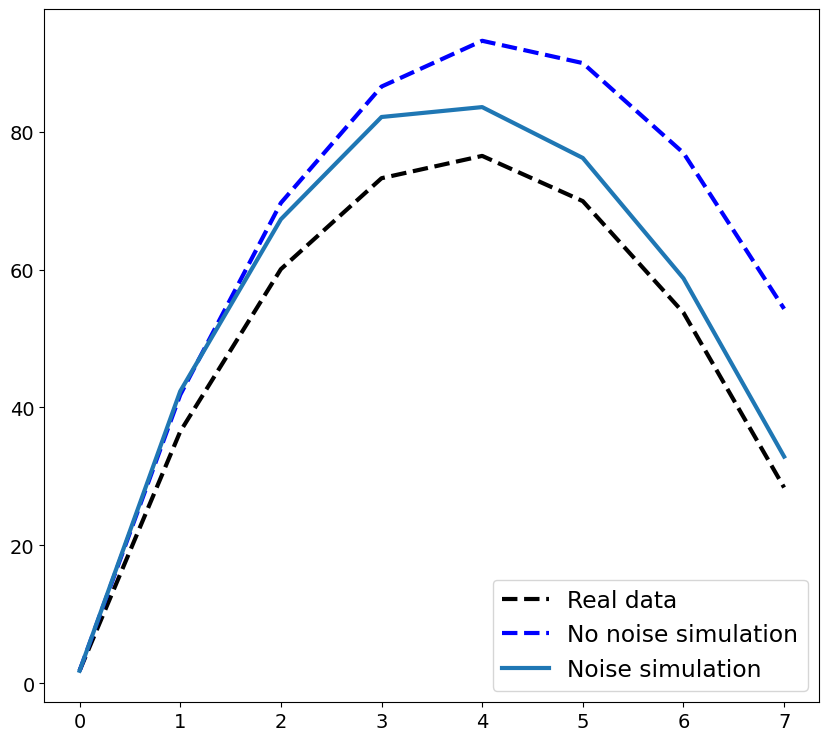

In [6]:
from progpy.models import ThrownObject
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Plot real data
times = [0, 1, 2, 3, 4, 5, 6, 7]
inputs = [{}]*8
outputs = [
    {'x': 1.83},
    {'x': 36.5091999066245},
    {'x': 60.05364349596605},
    {'x': 73.23733081022635},
    {'x': 76.47528104941956},
    {'x': 69.9146810161441},
    {'x': 53.74272753819968},
    {'x': 28.39355725512131},
]
pos = [state['x'] for state in outputs]
plt.plot(times, pos, color="black", linestyle="--", label="Real data")

# Plot model with no noise
m = ThrownObject(process_noise=0, measurement_noise=0)
simulated_results = m.simulate_to(times[-1], save_freq=1)
pos = [state['x'] for state in simulated_results.outputs]
plt.plot(times, pos, color="blue", linestyle="--", label="No noise simulation")

# Plot monte carlo simulations with random noise values
def estimate_noise(m, times, inputs, outputs):
    min_error = float('inf')   

    for _ in range(100):
        m.parameters['process_noise'] = 1
        m.parameters['measurement_noise'] = 0
        simulated_results = m.simulate_to(times[-1], save_freq=1)

        pos = [state['x'] for state in simulated_results.outputs]
        data_pos = [state['x'] for state in outputs]
        
        error = np.mean((np.array(pos) - np.array(data_pos))**2)

        if error < min_error:
            min_error = error
            min_process_noise = m.parameters['process_noise']
            min_measurement_noise = m.parameters['measurement_noise']
            min_pos = pos
        
    print('Error:', min_error)
    print('Process noise:', min_process_noise)
    print('Measurement noise:', min_measurement_noise)
    plt.plot(simulated_results.times, min_pos, label="Noise simulation")

estimate_noise(m, times, inputs, outputs)
plt.legend()
plt.show()